# SMU-MSDS-7333-Quantifying the World

## Case Study 3- Email Classification as Span or Ham 

By Rashmi Patel



# Introduction

In this case study, we will build a classifier using clustering and naive bayes classifier that classifies whether the email given is spam or ham. We will perform analysis by dividing this case study into 6 parts:

* Business Understanding

* Data Evaluation / Engineering

* Modeling Preparations

* Model Building & Evaluation

* Model Interpretability & Explainability

* Case Conclusions

In [1]:
#Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import sklearn as sk
import re
import os

#NLP
import nltk
import re 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import feature_extraction, model_selection, naive_bayes, metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

#Email Parser 
import email
from html.parser import HTMLParser
from bs4 import BeautifulSoup

## Business Understanding

## Data Evaluation/ Engineering

In [2]:
os.listdir()

['spam',
 'hard_ham',
 'spam_2',
 '.DS_Store',
 'Email Parsing and Word Vector Demo.ipynb',
 '~$DS7333_CaseStudy_2_RPatel.pptx',
 'easy_ham',
 'DS7333_CaseStudy_2_RPatel.pptx',
 'RP_SR_7333_CaseStudy3.ipynb',
 'demo reference cs3.ipynb',
 '.ipynb_checkpoints',
 'easy_ham_2',
 'MasterCopy.ipynb']

In [3]:
root = '/Users/arth/Desktop/RP-MSDS/Spring2022/QTW/CaseStudy3'
for item in os.listdir(root):
    if not item.startswith('.') and os.path.isfile(os.path.join(root, item)):
        print(item)

Email Parsing and Word Vector Demo.ipynb
~$DS7333_CaseStudy_2_RPatel.pptx
DS7333_CaseStudy_2_RPatel.pptx
RP_SR_7333_CaseStudy3.ipynb
demo reference cs3.ipynb
MasterCopy.ipynb


In [4]:
folder=[fdr for fdr in os.listdir('.') if(re.match(r'easy',fdr)) or (re.match(r'hard',fdr)) or (re.match(r'spam',fdr))]
folder

['spam', 'hard_ham', 'spam_2', 'easy_ham', 'easy_ham_2']

In [5]:
directory = []
for i in range(len(folder)):
    directory = folder[i]
    print(directory,':',len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))]))


spam : 1001
hard_ham : 501
spam_2 : 934
easy_ham : 5052
easy_ham_2 : 1401


In [6]:
def strip_head(text):
    tmp=[]
    flag = False
    for i in text:
        if i=='':
            flag = True
        if flag == True:
            tmp.append(i)
    return tmp

In [7]:
def get_text(email):
    if email.is_multipart():
        tmp = email.get_payload()[0]
        return get_text(tmp)
    elif email.is_multipart() == False:
        return email

### Parsing the Easy Ham folder

In [8]:
targets_eh = []
data_eh = []
count_eh = 0
not_spamList = os.listdir("./easy_ham/")
for i in not_spamList:
    with open("./easy_ham/"+i, "r",encoding= 'utf-8', errors='ignore') as f:
        x = email.message_from_file(f)
    x = get_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_eh.append(tmp)
        targets_eh.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = tmp.replace("-"," ")
        data_eh.append(tmp)
        targets_eh.append(0)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Total emails parsed in easy_ham:',len(data_eh))
print('Total targets for easy_ham:',len(targets_eh))


Total emails parsed in easy_ham: 5052
Total targets for easy_ham: 5052


### Parsing the Easy Ham 2 folder

In [9]:
targets_eh2 = []
data_eh2 = []
count_eh2 = 0
not_spamList = os.listdir("./easy_ham_2/")
for i in not_spamList:
    with open("./easy_ham_2/"+i, "r",encoding= 'utf-8', errors='ignore') as f:
        x = email.message_from_file(f)
    x = get_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_eh2.append(tmp)
        targets_eh2.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_eh2.append(tmp)
        targets_eh2.append(0)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Total emails parsed in easy_ham_2:',len(data_eh2))
print('Total targets for easy_ham_2:',len(targets_eh2))


Total emails parsed in easy_ham_2: 1401
Total targets for easy_ham_2: 1401


### Parsing the Hard Ham folder

In [10]:
targets_hh = []
data_hh = []
count_hh = 0
not_spamList = os.listdir("./hard_ham/")
for i in not_spamList:
    with open("./hard_ham/"+i, "r",encoding= 'utf-8', errors='ignore') as f:
        x = email.message_from_file(f)
    x = get_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_hh.append(tmp)
        targets_hh.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_hh.append(tmp)
        targets_hh.append(0)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Total emails parsed in hard_ham:',len(data_hh))
print('Total targets for easy_ham:',len(targets_hh))

Total emails parsed in hard_ham: 501
Total targets for easy_ham: 501


### Parsing the Spam folder

In [11]:

targets_sp = []
data_sp = []
count_sp = 0
spamList = os.listdir("./spam/")
for i in spamList:
    with open("./spam/"+i, "r",encoding= 'utf-8' or 'us-ascii' or 'windows-1252' or 'iso-8859-1', errors='ignore') as f:
        x = email.message_from_file(f)
    x = get_text(x)
    mailType = x.get_content_type()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_sp.append(tmp)
        targets_sp.append(0)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_sp.append(tmp)
        targets_sp.append(1)
    elif mailType == "multipart/alternative":
        tmp = BeautifulSoup(x.get_payload())
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_sp.append(tmp)
        targets_sp.append(1)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Total emails parsed in spam:',len(data_sp))
print('Total targets for spam:',len(targets_sp))

Total emails parsed in spam: 1001
Total targets for spam: 1001


### Parsing the Spam 2 folder

In [12]:
import chardet

targets_sp2 = []
data_sp2 = []
count_sp2 = 0
spamList = os.listdir("./spam_2/")
for i in spamList:
    with open("./spam_2/"+i, "r",encoding = 'utf-8' or 'us-ascii' or 'windows-1252' or 'iso-8859-1', errors='ignore' or 'surrogateescape') as f:
        x = email.message_from_file(f)
    x = get_text(x)
    mailType = x.get_content_type()
    textType = x.get_content_charset()
    if mailType == "text/plain":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_sp2.append(tmp)
        targets_sp2.append(1)
    elif mailType == "text/plain charset=us-ascii":
        tmp = x.get_payload()
        tmp = tmp.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_sp2.append(tmp)
        targets_sp2.append(1)
    elif mailType == "text/html":
        tmp = BeautifulSoup(x.get_payload(), 'html.parser')
        tmp = tmp.text.replace("\n"," ")
        tmp = tmp.replace(r'http\S+', ' ')
        tmp = re.sub(r'[^\w\s]', ' ',tmp)
        data_sp2.append(tmp)
        targets_sp2.append(1)
    else:
        print(f"msg {i} not parsed")
        print(x.get_content_type())
print('Total emails parsed in spam_2:',len(data_sp2))
print('Total targets for spam_2:',len(targets_sp2))


Total emails parsed in spam_2: 934
Total targets for spam_2: 934


In [13]:
data_total=len(data_sp2)+len(data_sp)+len(data_eh)+len(data_eh2)+len(data_hh)
target_total=len(targets_sp2)+len(targets_sp)+len(targets_eh)+len(targets_eh2)+len(targets_hh)

print(data_total==target_total)
print(target_total)

True
8889


In [14]:
data=data_sp2+data_sp+data_eh+data_eh2+data_hh
targets=targets_sp2+targets_sp+targets_eh+targets_eh2+targets_hh

print(len(data))
print(len(targets))

8889
8889


In [15]:
# Number of files parsed 
num=0
for i in range(len(folder)):
    t=len([name for name in os.listdir(folder[i]) if os.path.isfile(os.path.join(folder[i], name))])
    num=num+t

print('The total files given for parsing from different folders was:',num)
print('The total files parsed from different folders was:',data_total)
print('There was',num-data_total,'file/files which did not get parsed.')


The total files given for parsing from different folders was: 8889
The total files parsed from different folders was: 8889
There was 0 file/files which did not get parsed.


In [16]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stopset = set(stopwords.words('english'))
def remove_stopwords(dt):
    output_array=[]
    for sen in dt:
        temp_list=[]
        for word in sen.split():
            if word.lower() not in stopset:
                temp_list.append(word)
        output_array.append(' '.join(temp_list))
    return output_array

new_data = remove_stopwords(data)
print("data",len(data))
print("new_data",len(new_data))
print(np.unique(targets))
print(len(targets))

data 8889
new_data 8889
[0 1]
8889


In [17]:
df=pd.DataFrame(data={'Email': new_data, 'Spam/NotSpam': targets})
df.head()

,Email,Spam/NotSpam
0,Venez rencontrer l ame soeur sur LOVEIMPACT co...,1
1,man endowed 7 8 hammer simply better equipped ...,1
2,Date May 16 2002 Email edum hkem com Dear Sir ...,1
3,HTML BODY FREE CASINO SPORTSBOOK EARNING POTEN...,1
4,Hi make 50 000 next 90 days sending e mail See...,1


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8889 entries, 0 to 8888
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Email         8889 non-null   object
 1   Spam/NotSpam  8889 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 139.0+ KB


In [19]:
#Shuffle the data frame
df = df.sample(frac=1)
df.head(n=10)

,Email,Spam/NotSpam
492,,1
3491,Sun 8 Sep 2002 Gordon Mohr wrote Gary Lawrence...,0
733,GiftCD Offer Newsletter Confirmation August 8t...,1
432,20 20 Feeling Exposed Cover Assets 09 Policies...,1
5015,Sat Sep 14 2002 04 27 47PM 0100 Justin Mason w...,0
3957,Hi Wed 4 Sep 2002 Yannick Gingras wrote BTW th...,0
6116,exmh problem interaction sendmail Solaris mh s...,0
6529,something crudely along lines VMS VAX maybe 13...,0
4626,URL http www newsisfree com click 2 8668042 14...,0
1040,Help wanted 14 year old fortune 500 company gr...,0


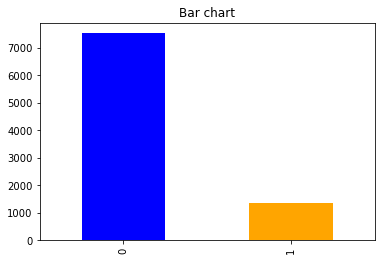

In [20]:
count_Class=pd.value_counts(df["Spam/NotSpam"])
count_Class.plot(kind= 'bar', color= ["blue", "orange"])
plt.title('Bar chart')
plt.show()

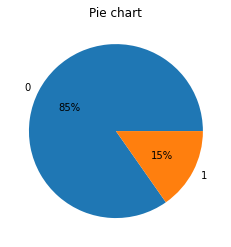

In [21]:
count_Class.plot(kind = 'pie',  autopct='%1.0f%%')
plt.title('Pie chart')
plt.ylabel('')
plt.show()

## Modeling Preparations

## Model building & Evaluations

In [22]:
#Model using Count Vectorizer
cv = CountVectorizer(tokenizer = nltk.word_tokenize,stop_words = nltk.corpus.stopwords.words("english"))
X_cv = cv.fit_transform(df['Email'].values).toarray()
y_cv = df.iloc[:, 1].values

/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [23]:
X_cv.shape

(8889, 84448)

In [24]:
y_cv.shape

(8889,)

In [25]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X_cv, y_cv, test_size = 0.30, random_state=42)

In [26]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)
classifier.fit(X_train , y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 0, 0])

In [27]:
cm_cv = metrics.confusion_matrix(y_test, y_pred)
print(cm_cv)
print(classification_report(y_test,y_pred,target_names=['Not Spam', 'Spam']))

[[2198   54]
 [  59  356]]
              precision    recall  f1-score   support

    Not Spam       0.97      0.98      0.97      2252
        Spam       0.87      0.86      0.86       415

    accuracy                           0.96      2667
   macro avg       0.92      0.92      0.92      2667
weighted avg       0.96      0.96      0.96      2667



<function matplotlib.pyplot.show(close=None, block=None)>

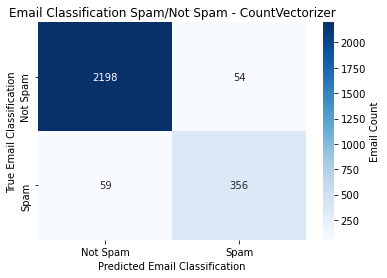

In [28]:
ax = plt.axes()
x_axis_labels = ['Not Spam', 'Spam']
y_axis_labels = ['Not Spam', 'Spam']
sns.heatmap(cm_cv, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Email Count',})
ax.set_title('Email Classification Spam/Not Spam - CountVectorizer')
plt.xlabel("Predicted Email Classification")
plt.ylabel("True Email Classification") 
plt.show

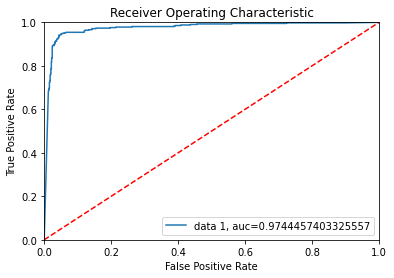

In [29]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred_proba = classifier.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


In [30]:
tfIdf = TfidfVectorizer(tokenizer = nltk.word_tokenize, stop_words = nltk.corpus.stopwords.words("english"))
X_tf = tfIdf.fit_transform(df['Email'].values).toarray()
y_tf = df.iloc[:, 1].values

/Users/arth/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


In [31]:
# Splitting the dataset into the Training set and Test set
X_train_tf, X_test_tf, y_train_tf, y_test_tf = train_test_split(X_tf, y_tf, test_size = 0.30, random_state=42)

In [32]:
print(X_train_tf.shape)
print(X_test_tf.shape)
print(y_train_tf.shape)
print(y_test_tf.shape)

(6222, 84448)
(2667, 84448)
(6222,)
(2667,)


In [33]:
from sklearn.naive_bayes import MultinomialNB
classifier_tfIdf = MultinomialNB(alpha=0.001, class_prior=None, fit_prior=True)
classifier_tfIdf.fit(X_train_tf , y_train_tf)
# Predicting the Test set results
y_pred_tf = classifier_tfIdf.predict(X_test_tf)
y_pred_tf

array([1, 1, 0, ..., 1, 0, 0])

In [34]:
cm_tfidf = metrics.confusion_matrix(y_test_tf, y_pred_tf)
print(cm_tfidf)
print(classification_report(y_test,y_pred,target_names=['Not Spam', 'Spam']))

[[2195   57]
 [  47  368]]
              precision    recall  f1-score   support

    Not Spam       0.97      0.98      0.97      2252
        Spam       0.87      0.86      0.86       415

    accuracy                           0.96      2667
   macro avg       0.92      0.92      0.92      2667
weighted avg       0.96      0.96      0.96      2667



<function matplotlib.pyplot.show(close=None, block=None)>

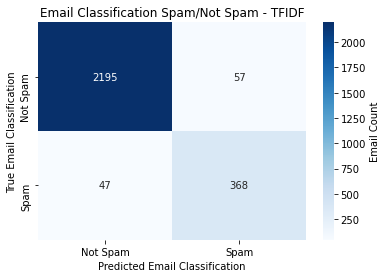

In [35]:
ax = plt.axes()
x_axis_labels = ['Not Spam', 'Spam']
y_axis_labels = ['Not Spam', 'Spam']
sns.heatmap(cm_tfidf, cmap='Blues', annot=True, fmt='d',xticklabels=x_axis_labels,
            yticklabels=y_axis_labels, ax=ax, cbar_kws={'label': 'Email Count',})
ax.set_title('Email Classification Spam/Not Spam - TFIDF')
plt.xlabel("Predicted Email Classification")
plt.ylabel("True Email Classification") 
plt.show

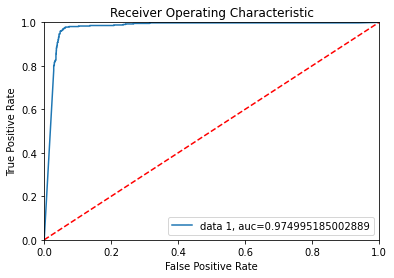

In [36]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
y_pred_proba = classifier_tfIdf.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()




## Clustering on TF-IDF

### K-Means Clustering

In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=1234).fit(X_train_tf)

In [53]:
k_cluster = kmeans.labels_
cluster_kmean = pd.DataFrame()
cluster_kmean['clusters'] = k_cluster
cluster_kmean['is_spam'] = y_train_tf


In [45]:
cluster_kmean.groupby(['clusters','is_spam']).size().unstack(fill_value=0)

is_spam,0,1
clusters,,
0,4362,896
1,918,46


In [55]:
label=kmeans.fit_predict(X_test_tf)


### DBSCAN Clustering

In [40]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=5, min_samples=10)
dbscan.fit(X_train_tf)

DBSCAN(eps=5, min_samples=10)

In [41]:
dbscan_cluster=dbscan.labels_
cluster_dbscan = pd.DataFrame()
cluster_dbscan['clusters'] = dbscan_cluster
cluster_dbscan['is_spam'] = y_train_tf


In [42]:
cluster_dbscan.groupby(['clusters','is_spam']).size().unstack(fill_value=0)


is_spam,0,1
clusters,,
0,7532,1357
